In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
filename = "graph_data.txt"
with open(filename, "r") as file:
    raw_data = file.read()

In [3]:
def generate_graph_plot(data_string):
    lines = data_string.strip().split('\n')

    header = lines[0].split()
    n_edges = int(header[1])

    edge_lines = lines[1 : 1 + n_edges]
    node_lines = lines[1 + n_edges : -1]
    
    path_info = lines[-1].split()
    start_node = path_info[0]
    end_node = path_info[1]

    G = nx.DiGraph()

    for line in edge_lines:
        parts = line.split()
        u, v, w = parts[0], parts[1], int(parts[2])
        G.add_edge(u, v, weight=w)

    for line in node_lines:
        parts = line.split()
        node = parts[0]
        h_value = int(parts[1])
        if node not in G:
            G.add_node(node)
        G.nodes[node]['h'] = h_value

    layers = {n: 0 for n in G.nodes()}
    
    try:
        sorted_nodes = list(nx.topological_sort(G))
        for node in sorted_nodes:
            current_depth = layers[node]
            for child in G.successors(node):
                # Push child to the right if needed
                if layers[child] < current_depth + 1:
                    layers[child] = current_depth + 1
    except nx.NetworkXUnfeasible:
        # Problem if graph has a cycle
        pass

    for node, depth in layers.items():
        G.nodes[node]['subset'] = depth

    node_colors = []
    for n in G.nodes():
        if n == start_node:
            node_colors.append("orange")
        elif n == end_node:
            node_colors.append("red")
        else:
            node_colors.append('lightblue')

    node_labels = {}
    for n in G.nodes():
        h_val = G.nodes[n].get('h', '?')
        node_labels[n] = f"{n}\n(h={h_val})"
        
    edge_labels = nx.get_edge_attributes(G, "weight")

    fig, ax = plt.subplots(figsize=(14, 8))
    
    pos = nx.multipartite_layout(G, subset_key='subset')
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, ax=ax)    
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=20, ax=ax)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)
    
    ax.set_title(f"Graph Visualization: {start_node} to {end_node}")
    ax.axis('off')
    
    return

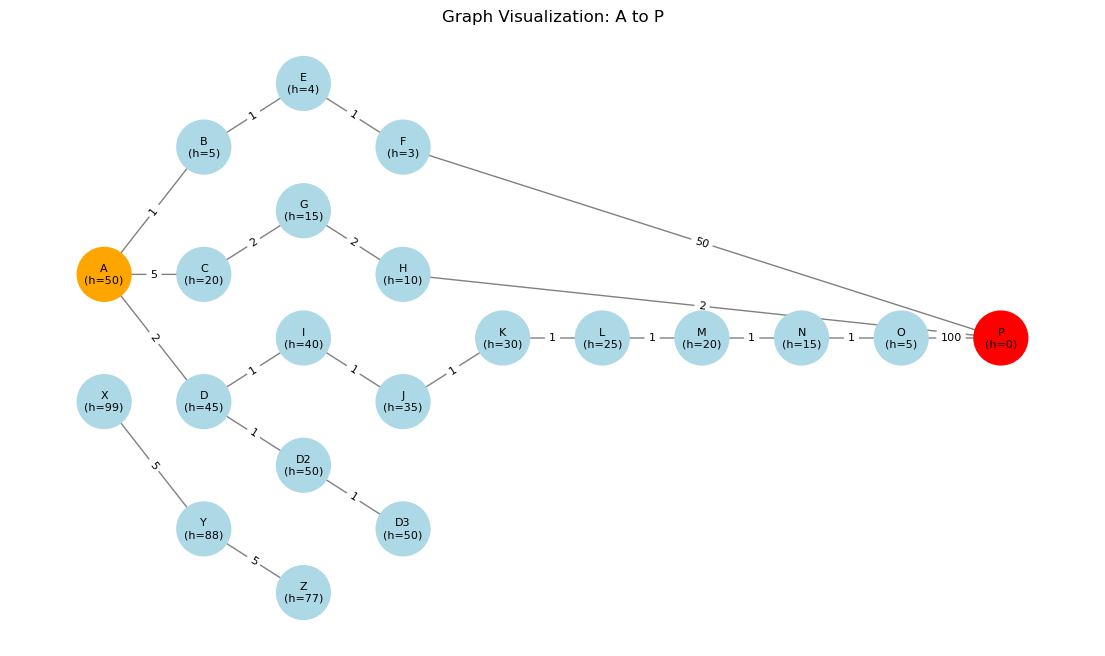

In [4]:
generate_graph_plot(raw_data)